# Police Dataset Toggling

## Importing Libraried and Dataset

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [126]:
df = pd.read_csv('/content/3. Police Data.csv')

In [127]:
df.drop(columns=['violation_raw', 'driver_age_raw', 'search_type', 'driver_race', 'stop_date', 'stop_time','country_name'], inplace=True)
df.head(2)

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,M,20.0,Speeding,False,Citation,False,0-15 Min,False
1,M,40.0,Speeding,False,Citation,False,0-15 Min,False


##Removing the NULL values from the Dataset

In [128]:
df.isnull().sum()

driver_gender         4061
driver_age            4307
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

In [129]:
cols = ['driver_gender',
       'driver_age', 'violation', 'stop_outcome', 'stop_duration', 'is_arrested']
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for columns in cols:
  df[columns] = si.fit_transform(df[columns].values.reshape(-1,1))

df.isnull().sum()

driver_gender         0
driver_age            0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

##In speeding were men or Women called more often

In [130]:
result = df[df.violation == 'Speeding'].driver_gender.value_counts()
result

M    29578
F    11686
Name: driver_gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


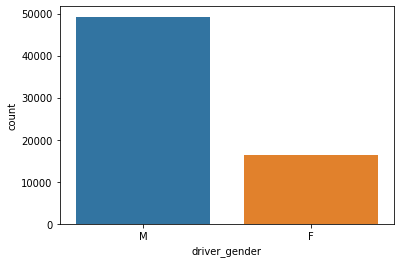

In [131]:
sns.countplot(df['driver_gender'])

##Grouping a specific columns, stoping of males were more or Females

In [132]:
 male_vs_female = df.groupby('search_conducted').driver_gender.value_counts()
 male_vs_female

search_conducted  driver_gender
False             M                47112
                  F                15944
True              M                 2113
                  F                  366
Name: driver_gender, dtype: int64

In [133]:
females_stoped = df[df.driver_gender == 'F'].search_conducted.value_counts()
males_stoped = df[df.driver_gender == 'M'].search_conducted.value_counts()
print('Number of females stoped {}'.format(females_stoped))

Number of females stoped False    15944
True       366
Name: search_conducted, dtype: int64


##What is the mean of stopped Duration by MAPPING Function

In [134]:
df.stop_duration.value_counts()

0-15 Min     51439
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

### Mapping the Values before Mean

In [135]:
df['stop_duration'] = df['stop_duration'].map( {'0-15 Min' : 7.5 , '16-30 Min' : 24 , '30+ Min': 45})
df['stop_duration'].mean()

11.897022919400616

##Age Distribution for Violation

In [136]:
df.head(2)

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,M,20.0,Speeding,False,Citation,False,7.5,False
1,M,40.0,Speeding,False,Citation,False,7.5,False


In [137]:
df.groupby('driver_age').violation.describe()

,count,unique,top,freq
driver_age,,,,
15.0,5,2,Moving violation,4
16.0,34,5,Speeding,18
17.0,449,5,Speeding,338
18.0,1345,5,Speeding,981
19.0,2388,5,Speeding,1655
...,...,...,...,...
83.0,2,2,Speeding,1
84.0,3,1,Speeding,3
85.0,1,1,Moving violation,1


# Machine Learning Algorithms

## Encoding the Catagorical Data

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['driver_gender', 'violation', 'stop_duration',
       'search_conducted', 'stop_outcome', 'is_arrested',
       'drugs_related_stop']

for columns in cols:
  df[columns] = le.fit_transform(df[columns])

df.head(2)

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1,20.0,5,0,2,0,0,0
1,1,40.0,5,0,2,0,0,0


### Dependent and Independent Variables

In [139]:
x = df.drop(columns='is_arrested').values
y = df['is_arrested'].values

### Test Train Split

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Defining a common function for algorithm testing:

In [141]:
def classify(x, y):
  classifier.fit(x, y)
  score = accuracy_score(classifier.predict(x_test), y_test)
  print('Accuracy Score for this model is: ', score)

### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classify(x_train, y_train)

Accuracy Score for this model is:  1.0


### K Nearest Neighbors

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classify(x_train, y_train)

Accuracy Score for this model is:  0.997787441824979


### Decision Tree Classfication

In [144]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classify(x_train, y_train)

Accuracy Score for this model is:  1.0


### Random Forest Classification

In [145]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classify(x_train, y_train)

Accuracy Score for this model is:  1.0


## Testing our model with input values, which gives whether the person is arrested or not

In [146]:
df.head(2)

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1,20.0,5,0,2,0,0,0
1,1,40.0,5,0,2,0,0,0


In [147]:
input_raw = np.asarray((1, 19, 2, 0, 0, 0, 0))
input = input_raw.reshape(1, -1)
predicted = classifier.predict(input)
print(predicted)

if predicted[0] == 0:
  print('You would not have been rejected')

else:
  print('Your were lucky that day, for not being present')

[1]
Your were lucky that day, for not being present


In [148]:
input_raw = np.asarray((1, 19, 6, 0, 2, 3, 0))
input = input_raw.reshape(1, -1)
predicted = classifier.predict(input)
print(predicted)

if predicted[0] == 0:
  print('You were safe, if u would have been there')

else:
  print('Your were lucky that day, for not being present')

[0]
You were safe, if u would have been there


##Conclusion:
###The above two input parameters gives us the detailed decription,  that whether a person would be caught or not, based on the true value of questions provided.